# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
data.head() 

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
data.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
data.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
dataFet = []
for i in data.columns:
    dataFet.append([i,
                     data[i].dtypes,
                     data[i].isna().sum(),
                     round((((data[i].isna().sum())/(len(data)))*100),2),
                     data[i].nunique(),
                     data[i].drop_duplicates().sample(2).values])

pd.DataFrame(dataFet, columns = ['dataFeatures', 'dataType', 'null', 'nullPict', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPict,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2008012938742, 2009010754182]"
1,Date Received,object,70,0.14,3522,"[7-Oct-03, 24-Feb-12]"
2,Incident Date,object,570,1.12,10788,"[8-Mar-14, 1/20/2011 17:40]"
3,Airport Code,object,2052,4.02,405,"[GTF, HXD]"
4,Airport Name,object,2052,4.02,419,"[Greenbrier Valley; Lewisburg, -]"
5,Airline Name,object,8555,16.75,243,"[Frontier Airlines, Aeroflot Russian Internati..."
6,Claim Type,object,1960,3.84,8,"[Personal Injury, -]"
7,Claim Site,object,190,0.37,6,"[-, Checkpoint]"
8,Item,object,1012,1.98,1854,[Bags - Fabric; plastic; etc. (not purses); Bi...
9,Claim Amount,object,992,1.94,13248,"[$2;480.00 , $27.13 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [8]:
data.replace({'-':np.nan},inplace=True)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [9]:
data['Date Received'] = pd.to_datetime(data['Date Received'])

In [10]:
# data['Incident Date'].fillna(0, inplace=True)

# def change_type(x):
#     x = str(x)
#     return x[:15]

# data['Incident Date'] = data['Incident Date'].apply(change_type)
# data['Incident Date']

In [11]:
error_rows = []
for i, item in enumerate(data['Incident Date']):
    try:
        pd.to_datetime(item)
    except ValueError:
        error_rows.append(i)

In [12]:
data.loc[error_rows,]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [13]:
import re
error_date = list(data.loc[error_rows,]['Incident Date'])
def replace_error(cols):
    incident_date = cols[0]
    received_yr = str(cols[1].year)
    if incident_date in error_date:
        incident_date = re.sub(r'\d{4}',received_yr,incident_date)
    return incident_date

In [14]:
data['Incident Date'] = data[['Incident Date','Date Received']].apply(replace_error,axis=1)

In [15]:
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [17]:
data.loc[error_rows,]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [18]:
data['Day Difference'] = (data['Date Received']-data['Incident Date']).dt.days

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distribution')

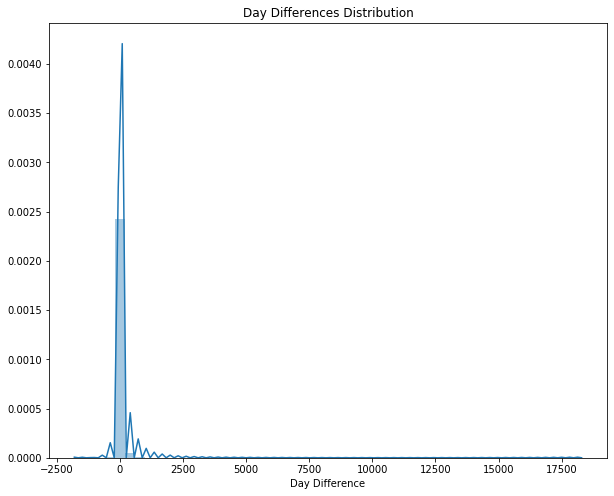

In [19]:
data_tanpanan = data.copy()['Day Difference'].dropna()
plt.figure(figsize=(10,8))
sns.distplot(data_tanpanan)
plt.title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

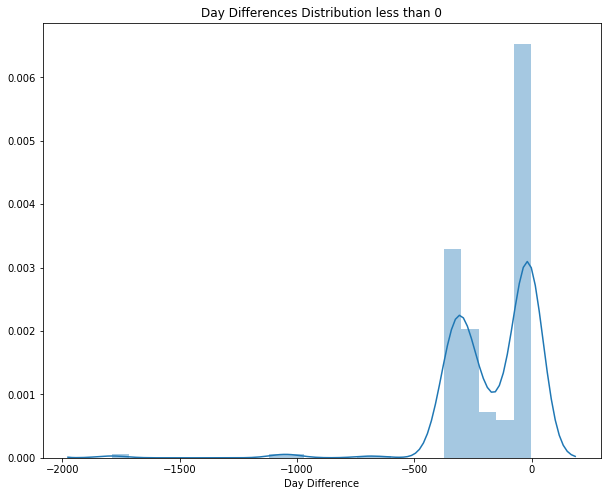

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(data_tanpanan[data_tanpanan<0])
plt.title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution more than 1000')

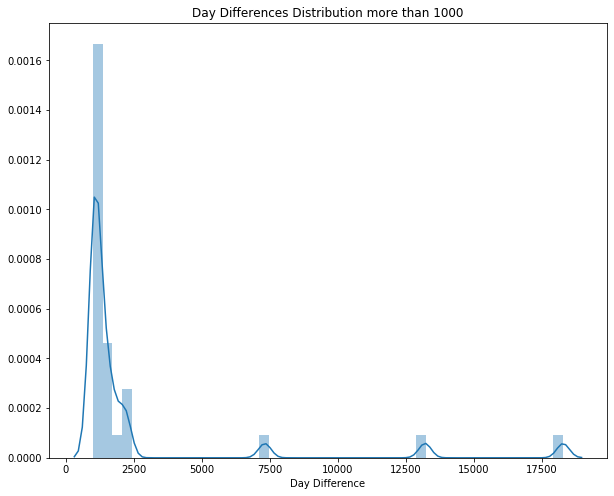

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(data_tanpanan[data_tanpanan>1000])
plt.title('Day Differences Distribution more than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [33]:
data[data['Day Difference']<0]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
12,0616624L,2002-09-30,2003-08-21 00:00:00,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$128.05,Denied,$0.00,Deny,-325.0
113,0616756L,2002-12-03,2003-02-04 00:00:00,JAX,Jacksonville International,NaN,Passenger Property Loss,Checkpoint,Other,$120.00,Approved,$120.00,Approve in Full,-63.0
343,0114002M,2003-01-14,2003-12-20 00:00:00,LAX,Los Angeles International Airport,American Airlines,NaN,Checked Baggage,Jewelry - Fine,$1;254.83,Denied,$0.00,Deny,-340.0
350,0115048M,2003-01-15,2003-10-08 00:00:00,JAX,Jacksonville International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$49.99,Approved,$49.99,Approve in Full,-266.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44380,2013011700003,2013-01-17,2013-01-17 07:00:00,ABQ,Albuquerque International Sunport Airport,NaN,Complaint,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
44471,2013021501524,2013-01-29,2013-01-29 23:45:00,LAS,McCarran International,Delta Air Lines,Property Damage,Checked Baggage,Baggage/Cases/Purses,$0.00,Deny,NaN,NaN,-1.0
44723,2013031202533,2013-03-05,2013-03-05 09:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Travel Accessories,NaN,NaN,NaN,NaN,-1.0
45519,2013071805244,2013-06-26,2013-06-26 07:49:00,LAX,Los Angeles International Airport,NaN,Property Damage,Checked Baggage,NaN,NaN,NaN,NaN,NaN,-1.0


C:\Users\DEPOSIT\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


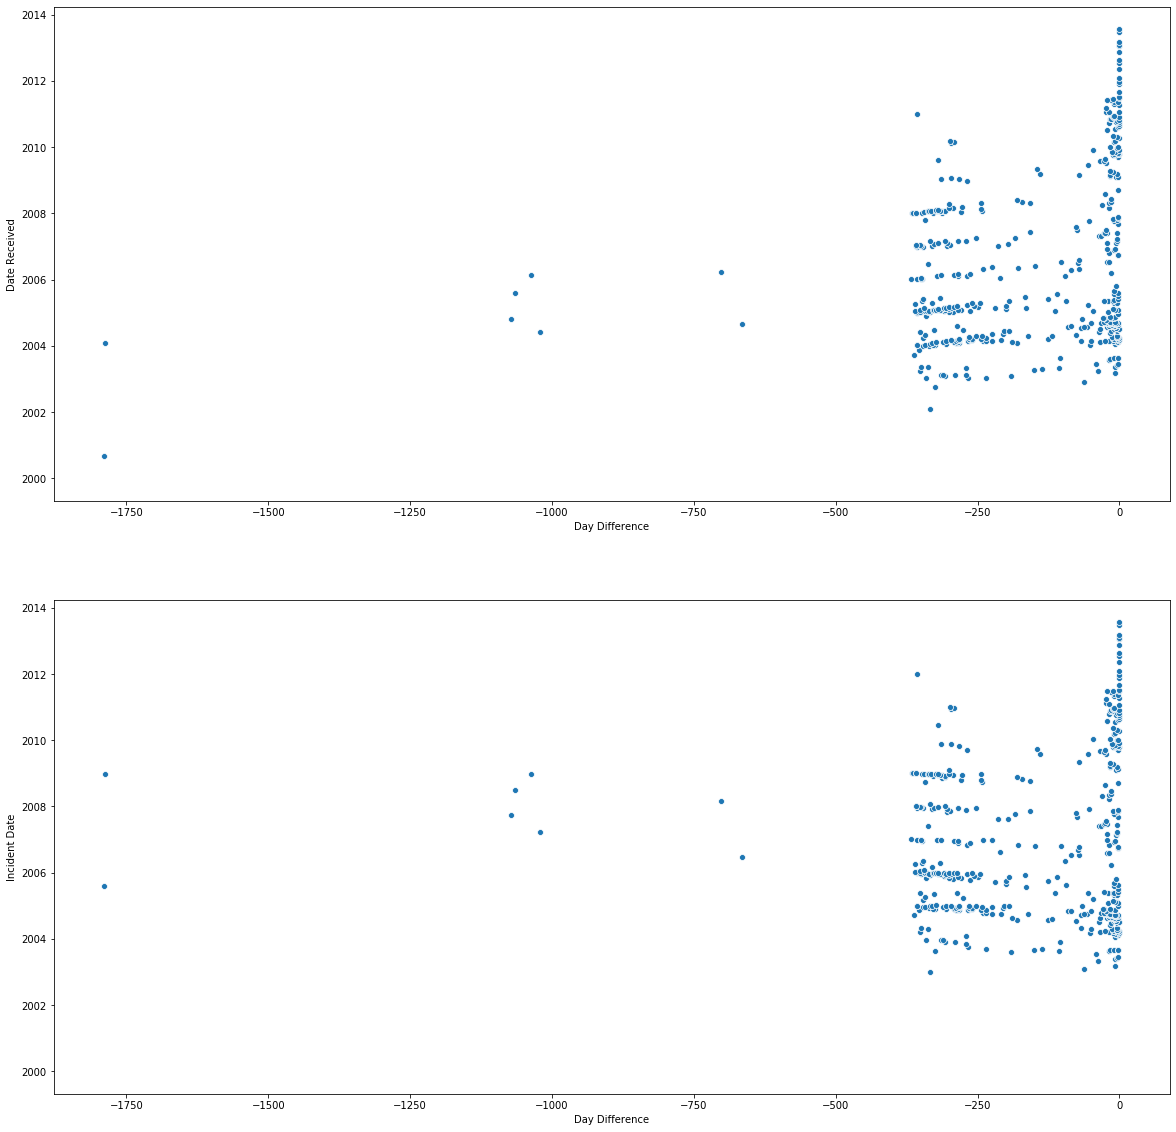

In [28]:
fig,ax = plt.subplots(2,1,figsize=(20,20))
sns.scatterplot('Day Difference','Date Received',data=data[data['Day Difference']<0],ax=ax[0])
sns.scatterplot('Day Difference','Incident Date',data=data[data['Day Difference']<0],ax=ax[1])

Kebanyakan data Day Difference pada waktu 0 hari atau pada hari itu juga, tetapi untuk Day Difference yang lebih dari 0 hari kemungkinan salah penulisan tahun.

In [29]:
data[data['Day Difference']<-1750]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference
6750,2009021755594,2004-02-05,2008-12-28,ORD,Chicago O'Hare International Airport,NaN,Passenger Property Loss,Checked Baggage,Luggage (all types including footlockers),$340.15,Denied,$0.00,Deny,-1788.0
24276,2005091992666,2000-09-08,2005-08-02,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,Other,$61.64,Settled,$35.70,Settle,-1789.0


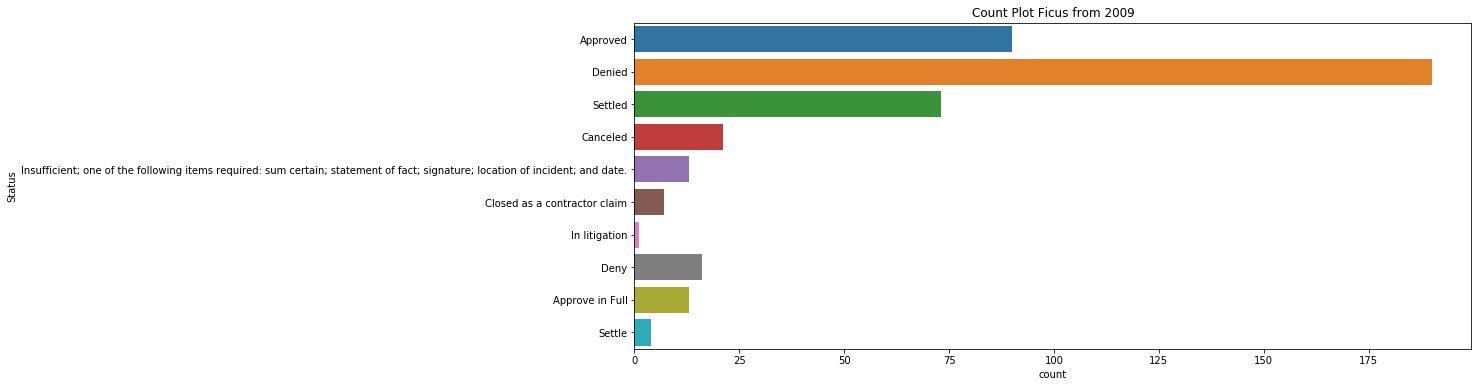

In [32]:
plt.figure(figsize=(15,6))
plt.title('Count Plot Ficus from 2009')
sns.countplot(data = data[(data['Day Difference']<0)], y = 'Status')

Dilihat dari status claim nya hampir 100 kasus di approved kemungkinan besar penulisan nya salah pada bagian tahun Date Received

In [36]:
data[data['Day Difference']>1000]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference
5727,1217135M,2003-12-17,2000-01-01 00:00:00,NaN,NaN,Continental Airlines,Property Damage,Checked Baggage,Other,$190.00,Settled,$90.00,Settle,1446.0
6885,0212302M,2004-02-12,2001-02-01 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$65.00,Approved,$65.00,Approve in Full,1106.0
7257,0305106M,2004-03-05,2000-01-01 00:00:00,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full,1525.0
9994,2004082661422,2004-07-19,2001-05-10 00:00:00,MCN,Middle Georgia Regional Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$3;767.85,Closed as a contractor claim,$0.00,NaN,1166.0
10932,2004100464331,2004-09-09,2001-09-01 00:00:00,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$30.00,Approved,$30.00,Approve in Full,1104.0
16208,2005061086208,2005-06-01,2002-04-30 00:00:00,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,$487.00,Settled,$243.50,Settle,1128.0
18767,2005112396390,2005-11-10,2000-11-03 00:00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,NaN,Insufficient; one of the following items requi...,NaN,NaN,1833.0
20800,2006041004307,2006-03-30,2003-03-04 00:00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Luggage (all types including footlockers),$199.99,Closed as a contractor claim,$0.00,NaN,1122.0
20981,2006042505316,2006-04-13,2003-07-16 00:00:00,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,$5;015.00,Denied,$0.00,Deny,1002.0
21876,2006062608536,2006-06-23,2003-06-07 00:00:00,COS,Colorado Springs Municipal,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$25.00,Denied,$0.00,Deny,1112.0


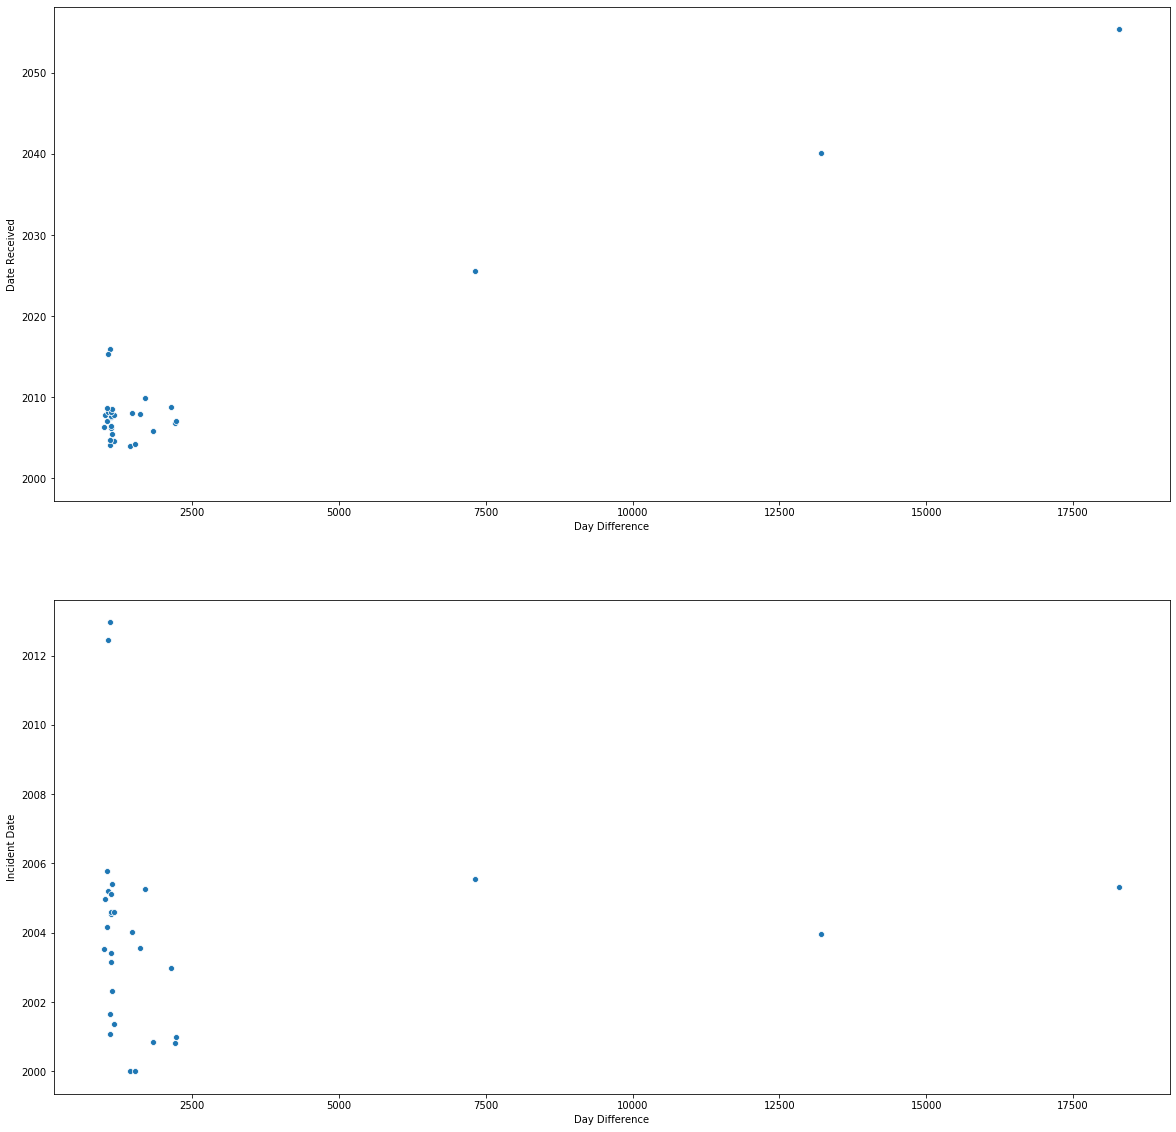

In [35]:
fig,ax = plt.subplots(2,1,figsize=(20,20))
sns.scatterplot('Day Difference','Date Received',data=data[data['Day Difference']>1000],ax=ax[0])
sns.scatterplot('Day Difference','Incident Date',data=data[data['Day Difference']>1000],ax=ax[1])

In [38]:
data[data['Day Difference']>5000]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference
24270,2005081290465,2025-08-02,2005-07-20,SAN,San Diego International,Jet Blue,Passenger Property Loss,Checked Baggage,Photographic Film,$32.14,Canceled,$0.00,NaN,7318.0
24271,0212087M,2040-02-12,2003-12-20,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Property Damage,Checked Baggage,Other,$8.48,Approved,$8.48,Approve in Full,13203.0
24272,2005051985108,2055-05-17,2005-04-30,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Other,$96.58,Denied,$0.00,Deny,18279.0


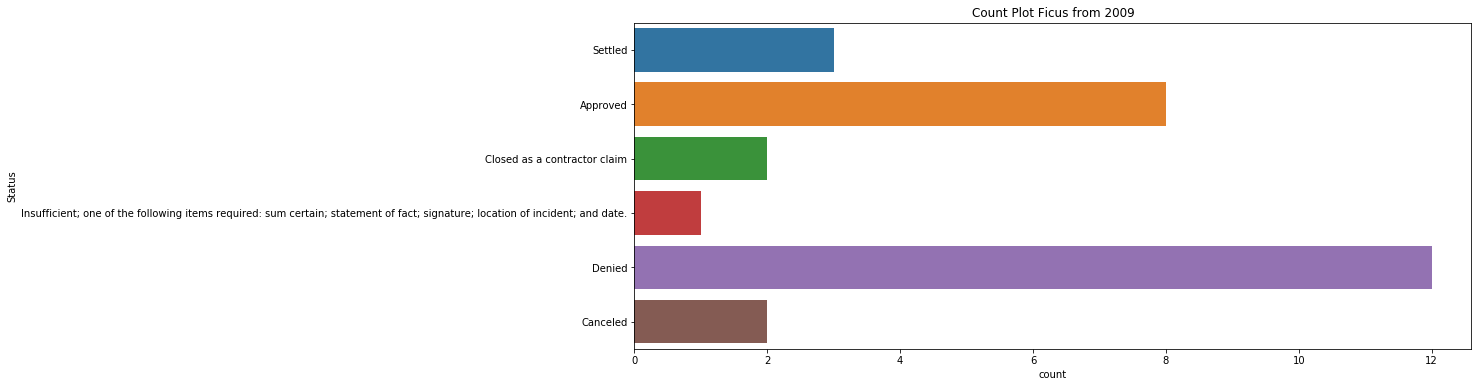

In [39]:
plt.figure(figsize=(15,6))
plt.title('Count Plot Ficus from 2009')
sns.countplot(data = data[(data['Day Difference']>1000)], y = 'Status')

Dilihat dari data yang Day Difference nya lebih dari 1000 hanya sedikit dan yang lebih dari 5000 hanya 3 ketika dilihat Date Recieved dan Incident Date nya ternyata Date Recieved nya ada yang sampai tahun 2050 padahal data ini baru sampai 2015. jadi dapat disimpulkan bahwa Day Difference yang lebih dari 1000 karena typo.

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [42]:
def amount_clean(c):
    if pd.isna(c):
        return c
    return float(re.sub(r'\W{1}(?=.{1}\d{2})','',re.sub(r'\$','',c)))

data['Claim Amount'] = data['Claim Amount'].apply(amount_clean)
data['Close Amount'] = data['Close Amount'].apply(amount_clean)

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [44]:
data['Amount Differences'] = data['Claim Amount'] - data['Close Amount']

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Difference        50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [46]:
data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

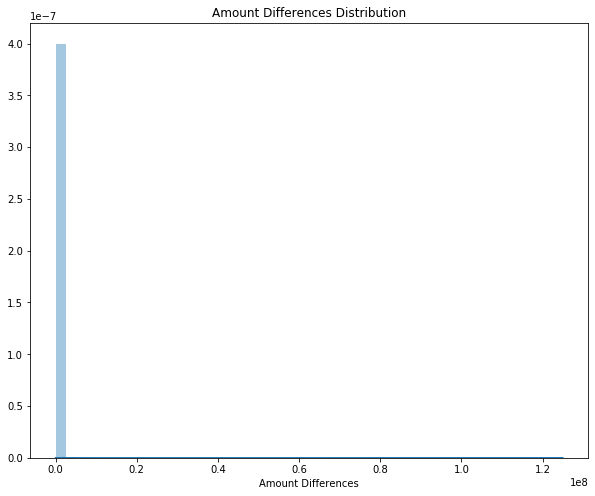

In [47]:
amountdif = data.copy()['Amount Differences'].dropna()
plt.figure(figsize=(10,8))
sns.distplot(amountdif)
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [48]:
ambil = data['Amount Differences'].describe()
IQR = ambil['75%']-ambil['25%']
upper = ambil['75%']+1.5*IQR
lower = ambil['25%']-1.5*IQR

In [63]:
outlier = [i for i in data['Amount Differences'].dropna() if not upper>=i>=lower]
data[data['Amount Differences'].isin(outlier)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [64]:
data[data['Amount Differences'].isin(outlier)]['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [66]:
data[data['Amount Differences'].isin(outlier)]['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

Ya saya setuju, karena Claim Amount nya sangat tinggi dan status nya 'denied' sehingga Close Amount nya 0 dan Amount Differences nya menjadi sangat tinggi yang mengakibatkan outlier pada Amount Differences menjadi sangat luas/lebar. Mungkin karena bukti kurang lengkap seperti tidak membawa bukti tiket pesawat saat melapor, personal injury seperti baju, tas, sepatu yang rusak atau memang orang yang tidak bertanggung jawab yang hanya mencari keuntungan nya sepihak.

In [128]:
data['Amount Differences'].describe()

count    3.347000e+04
mean     5.217843e+03
std      6.843299e+05
min     -4.311000e+02
25%      0.000000e+00
50%      9.629000e+01
75%      3.400000e+02
max      1.250000e+08
Name: Amount Differences, dtype: float64

In [134]:
data[data['Amount Differences'] > 50000]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences,COUNTER,Status Clear
318,0718501M,2003-01-13,NaT,NaN,NaN,NaN,NaN,Other,Computer - Laptop,3.500000e+05,Denied,0.0,Deny,NaN,3.500000e+05,1,Deny
1419,0428118L,2003-04-28,2003-03-15 00:00:00,GPT,Gulfport-Biloxi International,NaN,Personal Injury,Checkpoint,NaN,2.000000e+06,Denied,0.0,Deny,44.0,2.000000e+06,1,Deny
3992,0916042M,2003-09-16,2003-07-07 00:00:00,IAH,Houston - George Bush Intercontinental Airport,Continental Airlines,Personal Injury,Checkpoint,Clothing - Shoes; belts; accessories; etc.,1.350000e+05,Settled,9000.0,Settle,71.0,1.260000e+05,1,Settle
8499,2004051351848,2004-05-04,2004-04-22 00:00:00,JFK,John F. Kennedy International,Swiss Air,Passenger Property Loss,Checked Baggage,Computer - Laptop,1.000000e+06,Denied,0.0,Deny,12.0,1.000000e+06,1,Deny
10028,2004081161120,2004-07-20,2004-05-21 00:00:00,F,Foreign airport,Northwest Airlines,Personal Injury,Checked Baggage,Jewelry - Fine,9.600000e+04,Denied,0.0,Deny,60.0,9.600000e+04,1,Deny
10834,2004051452288,2004-08-31,2003-11-14 00:00:00,IND,Indianapolis International,Southwest Airlines,Personal Injury,Checkpoint,NaN,5.131200e+04,Denied,0.0,Deny,291.0,5.131200e+04,1,Deny
11464,2004092964200,2004-09-29,2004-05-14 00:00:00,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4.410000e+05,Denied,0.0,Deny,138.0,4.410000e+05,1,Deny
11944,2004120868867,2004-10-25,2004-07-10 00:00:00,BOS,Boston (Logan) International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,1.000000e+05,Denied,0.0,Deny,107.0,1.000000e+05,1,Deny
12277,2004122170217,2004-11-08,2004-03-24 00:00:00,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Personal Injury,Checkpoint,NaN,2.500000e+05,Denied,0.0,Deny,229.0,2.500000e+05,1,Deny
14973,2005040581611,2005-03-29,2004-04-14 00:00:00,PHL,Philadelphia International Airport,USAir,Personal Injury,Checkpoint,NaN,2.000000e+06,Denied,0.0,Deny,349.0,2.000000e+06,1,Deny


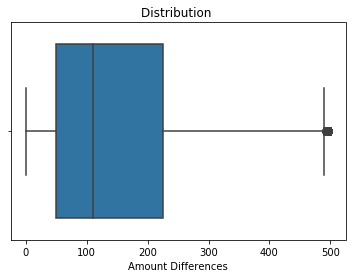

In [133]:
plt.title('Distribution ')
x = data[(data['Amount Differences'] > 0) & (data['Amount Differences']<500)]
sns.boxplot(x['Amount Differences'].dropna())

In [121]:
data[['Close Amount', 'Claim Amount', 'Amount Differences']].corr()

,Close Amount,Claim Amount,Amount Differences
Close Amount,1.000000,0.001835,-0.000321
Claim Amount,0.001835,1.000000,0.999998
Amount Differences,-0.000321,0.999998,1.000000


In [123]:
data.groupby('Disposition').mean()

,Claim Amount,Close Amount,Day Difference,Amount Differences,COUNTER
Disposition,,,,,
Approve in Full,153.307817,150.782694,43.427514,0.823551,1
Deny,11036.989827,24.278071,43.483143,10086.344517,1
Settle,574.509467,235.314091,41.631411,338.553175,1


## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

answer no. 1

In [75]:
from scipy.stats import chisquare
from scipy import stats

In [77]:
import researchpy as rp
table, results = rp.crosstab(data['Airport Name'], data['Claim Type'], prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 2496.0) =,20597.9355
1,p-value =,0.0000
2,Cramer's V =,0.2690


In [78]:
import researchpy as rp
table, results = rp.crosstab(data['Airline Name'], data['Claim Type'], prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1434.0) =,1875.1708
1,p-value =,0.0000
2,Cramer's V =,0.0879


In [82]:
import researchpy as rp
table, results = rp.crosstab(data['Airline Name'], data['Claim Amount'], prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 2748090.0) =,2.156783e+06
1,p-value =,1.000000e+00
2,Cramer's V =,4.903000e-01


In [160]:
import researchpy as rp
table, results = rp.crosstab(data['Airport Name'], data['Claim Amount'], prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 5306856.0) =,5.110506e+06
1,p-value =,1.000000e+00
2,Cramer's V =,5.261000e-01


In [165]:
data.groupby(['Airline Name']).count().sort_values('Claim Number',ascending=False)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences,COUNTER,Status Clear
Airline Name,,,,,,,,,,,,,,,,
American Airlines,4377,4369,4361,4293,4293,4211,4368,4244,4226,4285,3891,3796,4353,3881,4377,4285
Delta Air Lines,4371,4370,4355,4287,4287,4210,4364,4228,4212,4281,3845,3752,4354,3830,4371,4281
UAL,3507,3506,3498,3447,3447,3385,3499,3387,3394,3444,3061,2923,3497,3049,3507,3444
Southwest Airlines,3258,3254,3247,3220,3220,3169,3250,3113,3132,3175,2750,2698,3243,2739,3258,3175
Continental Airlines,2363,2363,2356,2319,2319,2285,2356,2312,2328,2363,2261,2217,2356,2257,2363,2363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Air Inter Europe,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Liat Airlines,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1
LOT Polish Airlines,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1


In [166]:
data.groupby(['Airport Name']).count().sort_values('Claim Number',ascending=False)

,Claim Number,Date Received,Incident Date,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences,COUNTER,Status Clear
Airport Name,,,,,,,,,,,,,,,,
John F. Kennedy International,2286,2285,2282,2286,2019,2233,2281,2174,2025,2050,1258,1250,2281,1253,2286,2050
Los Angeles International Airport,1813,1811,1798,1813,1370,1714,1808,1779,1733,1769,1613,1586,1796,1602,1813,1769
Newark International Airport,1747,1747,1737,1747,1500,1676,1736,1681,1616,1638,1178,1177,1737,1173,1747,1638
Chicago O'Hare International Airport,1712,1712,1704,1712,1439,1652,1706,1650,1593,1620,1209,1199,1704,1201,1712,1620
Orlando International Airport,1633,1630,1631,1633,1408,1592,1624,1561,1531,1546,970,956,1628,967,1633,1546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lea County Regional Airport,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0
Charles Shulz-Sonoma County,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Lebanon; New Hampshire,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0


Dari Uji Cramers V di atas terlihat bahwa Airplane dan Airport Name tidak memiliki hubungan terhadap claim type karena nilai cramers v nya mendekati 0.
Sedangkan untuk hubungan antara Airplane dan Airport Name hampir terdapat hubungan nya terhadap Claim Amount karena nilai cramers v nya hampir mendekati 1 yaitu di nilai 0,49 dan 0,52

In [94]:
data['Claim Type'].unique()

array(['Property Damage', nan, 'Passenger Property Loss',
       'Personal Injury', 'Passenger Theft', 'Employee Loss (MPCECA)',
       'Motor Vehicle', 'Complaint'], dtype=object)

In [140]:
data[data['Claim Type'].isna()]

In [154]:
data[data['Claim Type'].isna()]['Claim Site'].value_counts()

Checked Baggage    1203
Other               436
Checkpoint          257
Motor Vehicle         5
Name: Claim Site, dtype: int64

In [152]:
data.groupby(data['Claim Type'].isna()).count().sort_values('Claim Site')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences,COUNTER,Status Clear
Claim Type,,,,,,,,,,,,,,,,,
True,2031,1996,1649,1484,1484,1028,0,1901,1877,1558,1979,1535,1460,1647,1343,2031,1979
False,49035,49000,48847,47431,47431,40442,49035,48916,47041,45328,45898,32251,31386,48813,32127,49035,45898


Kenapa Claim Type nya banyak yang nan? mungkin Claim Type nya tidak tercatat karena Claim Type paling banyak nan di Claim Site Checked Baggage saat penumpang banyak penumpang yang keluar tanpa melewati pengecekan terlebih dahulu.

# answer no. 2. 
If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

Menurut saya Status dan Disposition hampir sama hanya saja Status lebih spesifik sedangkan Disposition adalah keputusan akhir apakah claim nya diterima sepenuhnya, sebagian atau ditolak

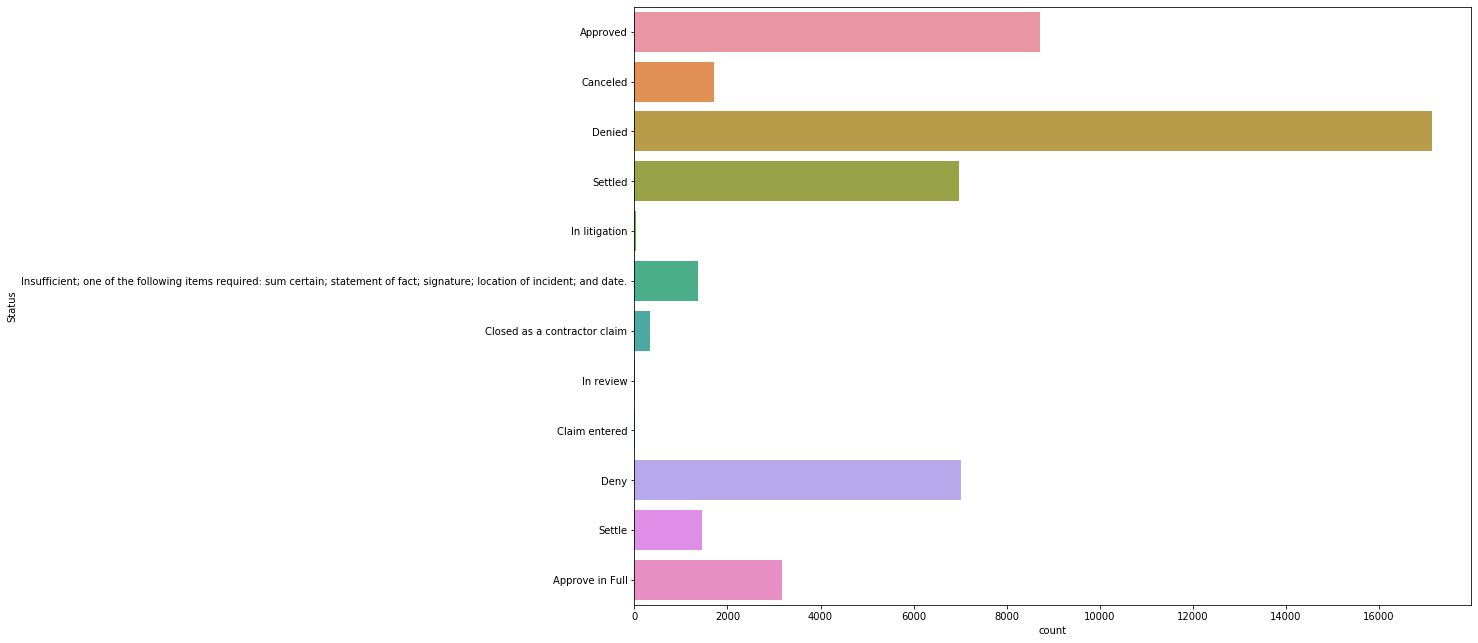

In [113]:
plt.figure(figsize=(15,11))
sns.countplot(y = data['Status'])

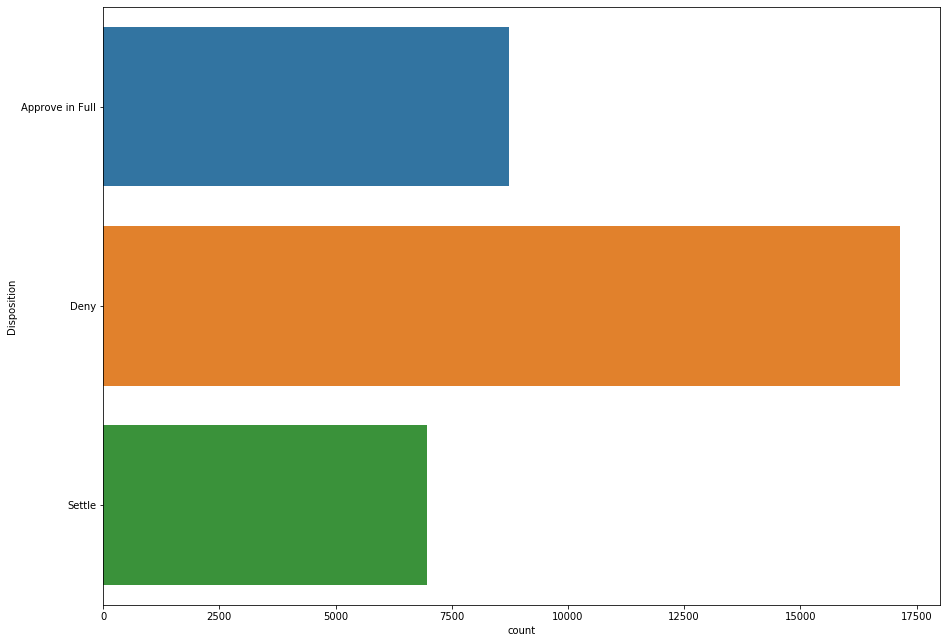

In [101]:
plt.figure(figsize=(15,11))
sns.countplot(y = data['Disposition'])

In [110]:
def penggabungan(cols):
    if cols == 'Approved' or cols == 'Approve in Full':
        cols = 'Approve in Full'
    elif cols == 'Deny' or cols == 'Denied':
        cols = 'Deny'
    elif cols == 'Settled' or cols == 'Settle':
        cols = 'Settle'
    return cols
data['Status Clear'] = data['Status'].apply(penggabungan)

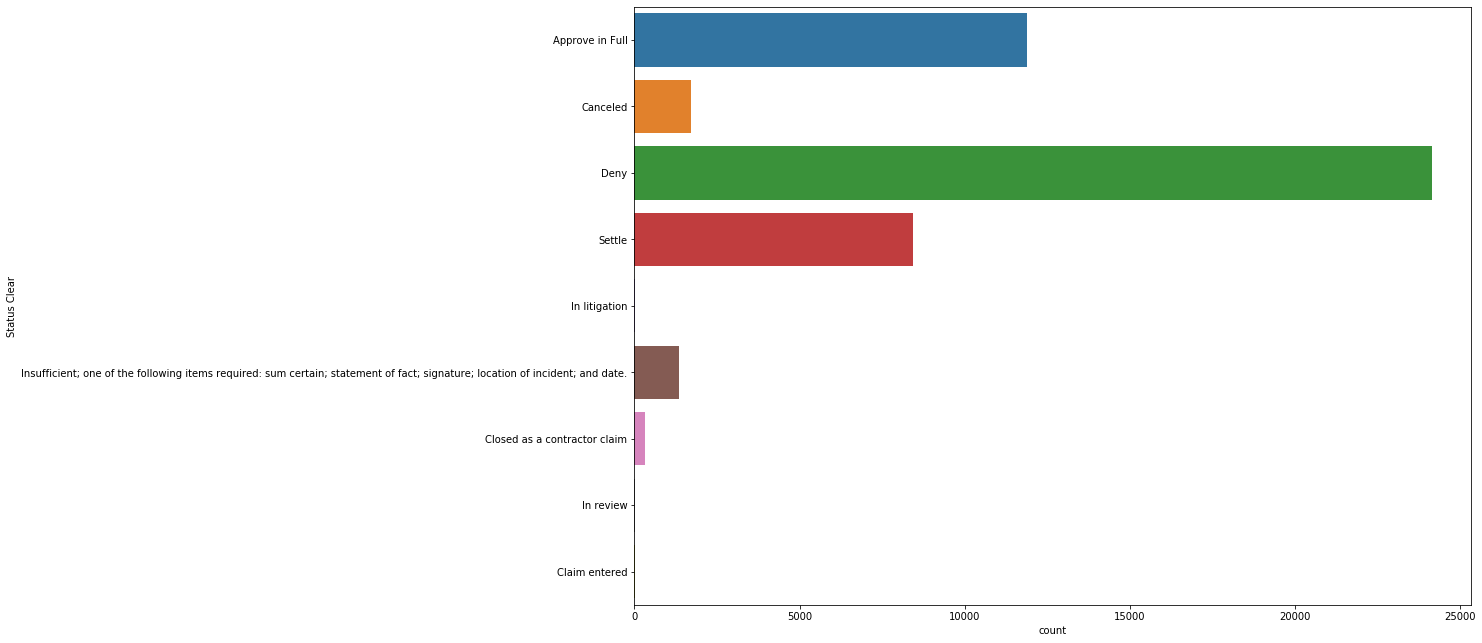

In [111]:
plt.figure(figsize=(15,11))
sns.countplot(y = data['Status Clear'])

In [112]:
data['COUNTER'] =1
group_data = data.groupby(['Status Clear','Disposition'])['COUNTER'].sum()
print(group_data)

Status Clear                                                                                                                   Disposition    
Approve in Full                                                                                                                Approve in Full     8724
Canceled                                                                                                                       Approve in Full        1
                                                                                                                               Deny                   2
                                                                                                                               Settle                 2
Deny                                                                                                                           Deny               17125
In litigation                                                                                    

Terdapat hubungan antara status dan disposition dengan claim amount and close amount, ketika nilai claim amount = close amount status akan menjadi approved dan disposition akan approved in full, sedangkan apabila nilai claim amount != close amount status akan menjadi denied dan disposition menjadi Deny.

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [155]:
data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,Amount Differences,COUNTER,Status Clear
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00,1,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN,1,Canceled
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00,1,Deny
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44,1,Approve in Full
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22,1,Canceled


In [174]:
data['Amount Differences'].describe()

count    3.347000e+04
mean     5.217843e+03
std      6.843299e+05
min     -4.311000e+02
25%      0.000000e+00
50%      9.629000e+01
75%      3.400000e+02
max      1.250000e+08
Name: Amount Differences, dtype: float64

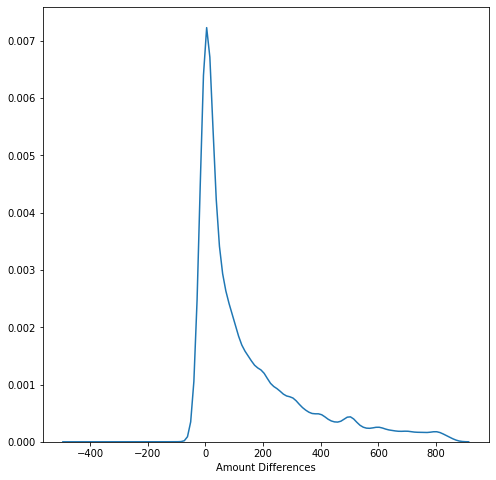

In [175]:
Q1_like = data['Amount Differences'].describe()['25%']
Q3_like = data['Amount Differences'].describe()['75%']
IQR = Q3_like - Q1_like

plt.figure(figsize = (8,8))
sns.distplot(data[(data['Amount Differences'] >= Q1_like - (1.5*IQR)) & (data['Amount Differences'] <= Q3_like + (1.5 * IQR))]['Amount Differences'], hist = False)

out_like = data[(data['Amount Differences'] >= Q1_like - (1.5*IQR)) & (data['Amount Differences'] <= Q3_like + (1.5 * IQR))]['Amount Differences'].index

In [176]:
data_not = data.loc[out_like].copy()

In [179]:
data['Amount Differences'].describe()

count    3.347000e+04
mean     5.217843e+03
std      6.843299e+05
min     -4.311000e+02
25%      0.000000e+00
50%      9.629000e+01
75%      3.400000e+02
max      1.250000e+08
Name: Amount Differences, dtype: float64

In [181]:
data_delta = data_not[data_not['Amount Differences'] != 0]

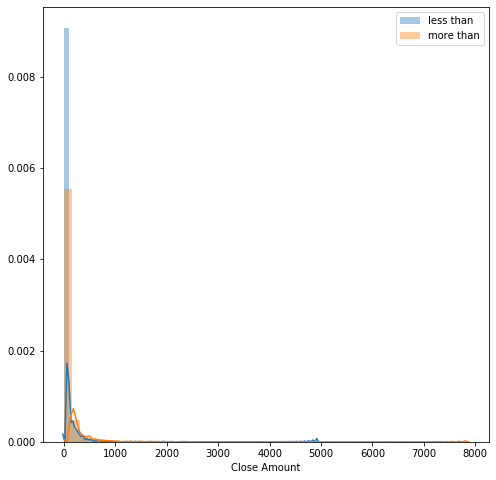

In [182]:
plt.figure(figsize = (8, 8))
sns.distplot(data_delta[data_delta['Amount Differences'] <= 9.629000e+01]['Close Amount'], label = 'less than')
sns.distplot(data_delta[data_delta['Amount Differences'] > 9.629000e+01]['Close Amount'], label = 'more than')

plt.legend()

In [183]:
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [184]:
anderson(data_delta[data_delta['Amount Differences'] <= 9.629000e+01]['Close Amount'])

AndersonResult(statistic=1505.8230167564088, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [185]:
try_normal(data_delta[data_delta['Amount Differences'] <= 9.629000e+01]['Close Amount'])

C:\Users\DEPOSIT\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.091,
  'stat': 1505.8230167564088},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [186]:
try_normal(data_delta[data_delta['Amount Differences'] > 9.629000e+01]['Close Amount'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 2760.601307417841},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [187]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(data_delta[data_delta['Amount Differences'] <= 9.629000e+01]['Close Amount'], 
                        data_delta[data_delta['Amount Differences'] > 9.629000e+01]['Close Amount']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 44066807.5
P-Value: 3.0620542593678934e-86


Terdapat perbedaan dari data Amount Difference terhadap Close Amount dibawah 96.29 dan di atas nya.

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [24]:
np.random.seed(101)

Export the data to your SQL database, and try to connect the database to the dashboard